In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('synthetic_ecommerce_churn_dataset.csv')
og=pd.read_csv('synthetic_ecommerce_churn_dataset.csv')
df.shape

(5000, 13)

In [4]:
df

,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk
0,CUST_8270,30,Female,Brazil,101.08,8,176,1,Beauty,25.6,2024-06-05,50,0.20
1,CUST_1860,53,Female,USA,90.39,10,88,0,Electronics,12.3,2024-02-19,37,0.34
2,CUST_6390,73,Male,Australia,83.28,6,203,0,Sports,NaN,2024-04-16,65,0.05
3,CUST_6191,30,Other,Japan,109.90,9,346,1,Electronics,42.9,2020-07-08,93,0.19
4,CUST_6734,29,Female,Canada,269.38,16,342,0,Fashion,5.3,2025-04-09,79,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,CUST_8533,49,Female,UK,132.16,9,306,0,Electronics,20.9,2020-10-17,13,0.33
4996,CUST_5616,23,Female,UK,47.81,10,296,0,Home,NaN,2024-10-21,66,0.22
4997,CUST_2140,79,Male,Japan,224.97,16,84,0,Beauty,92.9,2022-11-13,56,0.23
4998,CUST_6730,62,Male,USA,220.33,8,254,0,Fashion,83.8,2023-05-29,47,0.09


Data Processing

In [5]:
df.isnull().sum()

customer_id             0
age                     0
gender                  0
country                 0
avg_order_value       250
total_orders            0
last_purchase           0
is_fraudulent           0
preferred_category      0
email_open_rate       250
customer_since          0
loyalty_score           0
churn_risk              0
dtype: int64

In [6]:
df=df.drop(columns=['customer_id'])

In [7]:
df.shape

(5000, 12)

In [8]:

df['avg_order_value'].fillna(df['avg_order_value'].median(), inplace=True)
df['email_open_rate'].fillna(df['email_open_rate'].median(), inplace=True)

df.isnull().sum()


C:\Users\Chirag\AppData\Local\Temp\ipykernel_15368\1946112737.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_order_value'].fillna(df['avg_order_value'].median(), inplace=True)
C:\Users\Chirag\AppData\Local\Temp\ipykernel_15368\1946112737.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

age                   0
gender                0
country               0
avg_order_value       0
total_orders          0
last_purchase         0
is_fraudulent         0
preferred_category    0
email_open_rate       0
customer_since        0
loyalty_score         0
churn_risk            0
dtype: int64

In [9]:
gender_clean = {"gender": {"Female": 1, "Male": 0,"Other":2}}
df=df.replace(gender_clean)
df.head()

C:\Users\Chirag\AppData\Local\Temp\ipykernel_15368\3885996057.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace(gender_clean)


,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk
0,30,1,Brazil,101.08,8,176,1,Beauty,25.60,2024-06-05,50,0.20
1,53,1,USA,90.39,10,88,0,Electronics,12.30,2024-02-19,37,0.34
2,73,0,Australia,83.28,6,203,0,Sports,50.95,2024-04-16,65,0.05
3,30,2,Japan,109.90,9,346,1,Electronics,42.90,2020-07-08,93,0.19
4,29,1,Canada,269.38,16,342,0,Fashion,5.30,2025-04-09,79,0.15


In [10]:
df=pd.get_dummies(df, columns=["country","preferred_category"],prefix=["country","cat"])

In [11]:
df.shape

(5000, 25)

Data Visualisation

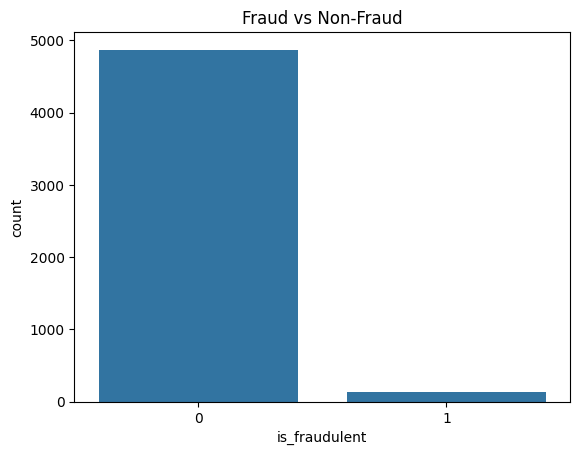

In [12]:
sns.countplot(x='is_fraudulent', data=df)
plt.title("Fraud vs Non-Fraud")
plt.show()

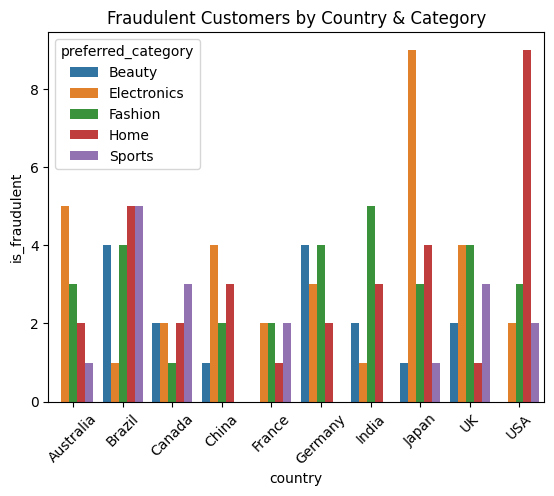

In [13]:
grouped = og.groupby(['country', 'preferred_category'])['is_fraudulent'].sum().reset_index()
sns.barplot(x='country', y='is_fraudulent', hue='preferred_category', data=grouped)
plt.xticks(rotation=45)
plt.title("Fraudulent Customers by Country & Category")
plt.show()


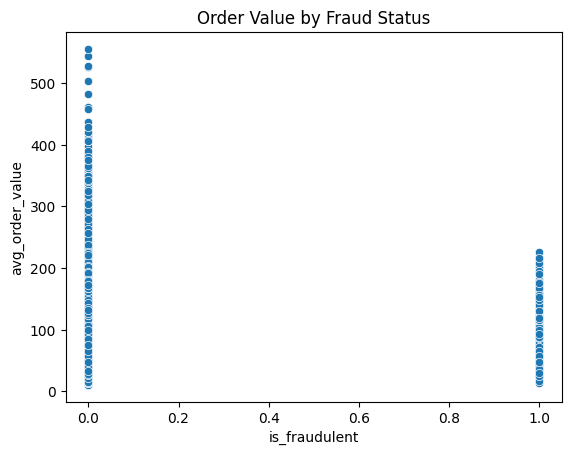

In [14]:
sns.scatterplot(x='is_fraudulent', y='avg_order_value', data=df)
plt.title("Order Value by Fraud Status")
plt.show()

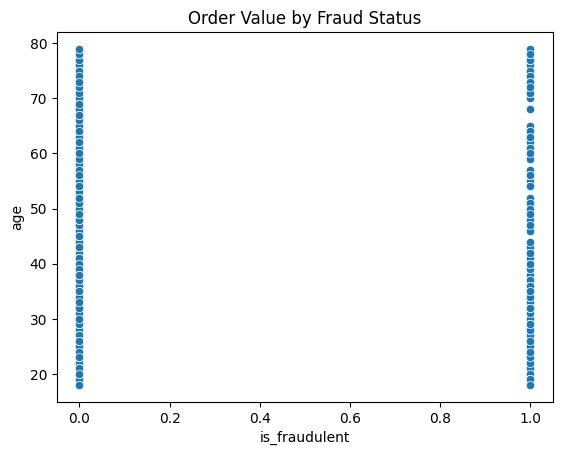

In [ ]:
sns.scatterplot(x='is_fraudulent', y='age', data=df)
plt.show()

Model Training

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop(columns=['is_fraudulent','customer_since'])
y = df['is_fraudulent']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000,class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42,class_weight='balanced'),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.55      0.71       974
           1       0.04      0.62      0.07        26

    accuracy                           0.56      1000
   macro avg       0.51      0.58      0.39      1000
weighted avg       0.96      0.56      0.69      1000


Model: Random Forest
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       974
           1       0.00      0.00      0.00        26

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.95      0.97      0.96      1000



c:\Users\Chirag\AppData\Local\Programs\Python\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Chirag\AppData\Local\Programs\Python\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Chirag\AppData\Local\Programs\Python\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c


Model: KNN
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       974
           1       0.00      0.00      0.00        26

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.95      0.97      0.96      1000



c:\Users\Chirag\AppData\Local\Programs\Python\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Chirag\AppData\Local\Programs\Python\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Chirag\AppData\Local\Programs\Python\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

In [20]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(class_weight='balanced',is_unbalance=True, random_state=42)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

[LightGBM] [Info] Number of positive: 103, number of negative: 3897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1051
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       974
           1       0.05      0.08      0.06        26

    accuracy                           0.93      1000
   macro avg       0.51      0.52      0.51      1000
weighted avg       0.95      0.93      0.94      1000



In [21]:
from xgboost import XGBClassifier

scale = (y_train == 0).sum() / (y_train == 1).sum()

xgb_model = XGBClassifier(scale_pos_weight=scale, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       974
           1       0.20      0.04      0.06        26

    accuracy                           0.97      1000
   macro avg       0.59      0.52      0.52      1000
weighted avg       0.95      0.97      0.96      1000



c:\Users\Chirag\AppData\Local\Programs\Python\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:38:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  
    'solver': ['liblinear'],  
}

logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
grid = GridSearchCV(logreg, param_grid, scoring='recall', cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best recall score (CV):", grid.best_score_)

# Evaluate on test set
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))


Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best recall score (CV): 0.44761904761904764
              precision    recall  f1-score   support

           0       0.98      0.55      0.70       974
           1       0.04      0.62      0.07        26

    accuracy                           0.55      1000
   macro avg       0.51      0.58      0.39      1000
weighted avg       0.96      0.55      0.69      1000



In [23]:
#We can see that Logistic Regression is giving the best results

In [24]:
import joblib

In [25]:
joblib.dump(models['Logistic Regression'],'logistic.pkl')

['logistic.pkl']